# 対応のないT検定
用途としては違う集団で似た性質か違う性質かを検定する。今回は機械学習用データセットで異なるクラスでどのようになるかを検定して分布を確認する。具体的にはデータセットのクラスごとに有意確率を求めてクラスごとに特徴量の分布の違いの度合いを計算する。ここで、特徴量はp値は「たまたま二群間での平均値が同じ確率」を指す。

ここで、対応のないt検定ではF検定を事前に行い「スチューデントのt検定」か「ウェルチのt検定」のどちらを使うかあらかじめ決める。

また、正規分布を使用してp値によって分布の違いを可視化してどの程度違うかを確認する。

## ライブラリのインポート

In [1]:
import pandas as pd
import scipy.stats as stats
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

## データの読み込み

In [2]:
df = pd.read_csv("iris.csv")
df.head()

,category,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0,5.1,3.5,1.4,0.2
1,0,4.9,3.0,1.4,0.2
2,0,4.7,3.2,1.3,0.2
3,0,4.6,3.1,1.5,0.2
4,0,5.0,3.6,1.4,0.2


## カテゴリとなる目的変数

In [3]:
y_name = "category"
y_data = list(set(df[y_name].values.tolist()))
y_data

[0, 1, 2]

## カテゴリごとにt検定を行いp値の算出と正規分布による可視化
異なるカテゴリの同一変数でt検定を行うが、事前にF検定でp値を算出してF検定のp値が0.05以下ならウェルチのt検定を用いて0.05より大きい場合はスチューデントのt検定を行う。

また、t検定のp値が二群間でたまたま平均値が等しくなる確率であることを確認するため、正規分布を用いた尤度関数でその変数の数値の確率密度関数を可視化する。

カテゴリ0とカテゴリ1の比較
カラム名:sepal length (cm)
平均の差:	0.9299999999999997
差の標準偏差:	-0.08839475466938762
自由度:		98
t値:		-10.52098626754911
p値:		3.746742613983842e-17


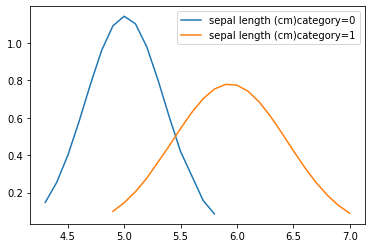


カラム名:sepal width (cm)
平均の差:	0.6479999999999997
差の標準偏差:	0.06980673027607534
自由度:		98
t値:		9.282772555558111
p値:		4.362239016010214e-15


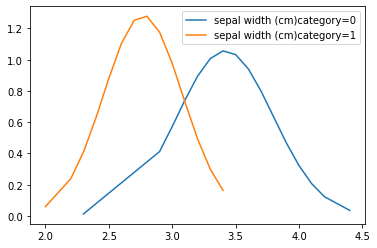


カラム名:petal length (cm)
平均の差:	2.796
差の標準偏差:	-0.07084101198876142
自由度:		98
t値:		-39.46866259397271
p値:		1.057210030060334e-45


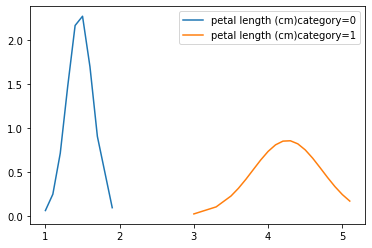


カラム名:petal width (cm)
平均の差:	1.0819999999999999
差の標準偏差:	-0.03181194744117374
自由度:		98
t値:		-34.01237858829048
p値:		1.53779680512802e-47


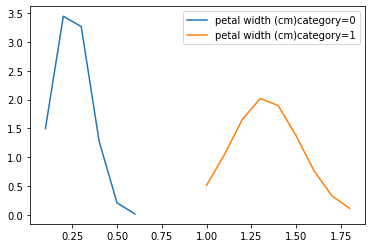


カテゴリ0とカテゴリ2の比較
カラム名:sepal length (cm)
平均の差:	1.581999999999998
差の標準偏差:	-0.10281943753344443
自由度:		98
t値:		-15.386195820079404
p値:		3.9668672709859296e-25


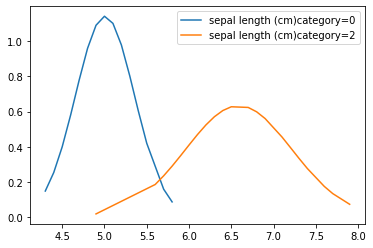


カラム名:sepal width (cm)
平均の差:	0.44399999999999995
差の標準偏差:	0.07059513771774764
自由度:		98
t値:		6.289384996672061
p値:		8.916634067006443e-09


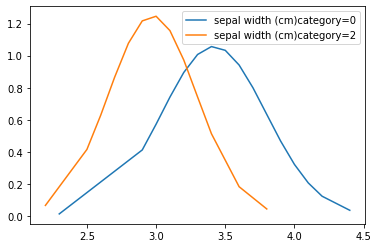


カラム名:petal length (cm)
平均の差:	4.088000000000001
差の標準偏差:	-0.08181612036157916
自由度:		98
t値:		-49.965703359355636
p値:		9.713867061697096e-50


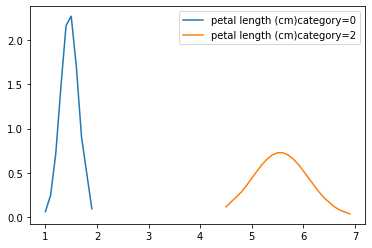


カラム名:petal width (cm)
平均の差:	1.7820000000000003
差の標準偏差:	-0.0416956905716274
自由度:		98
t値:		-42.73822967241116
p値:		1.4667494246530803e-48


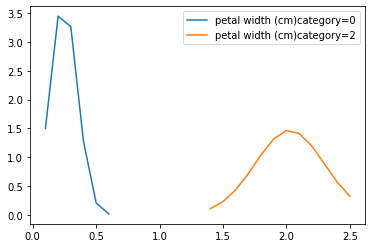


カテゴリ1とカテゴリ2の比較
カラム名:sepal length (cm)
平均の差:	0.6519999999999984
差の標準偏差:	-0.11582534353103226
自由度:		98
t値:		-5.629165259719801
p値:		1.7248563024547942e-07


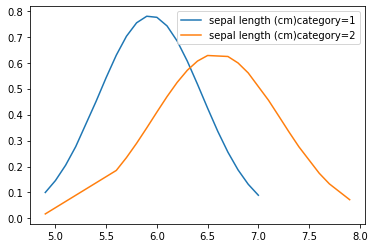


カラム名:sepal width (cm)
平均の差:	0.20399999999999974
差の標準偏差:	-0.06363544128671618
自由度:		98
t値:		-3.2057607502218186
p値:		0.0018191004238894803


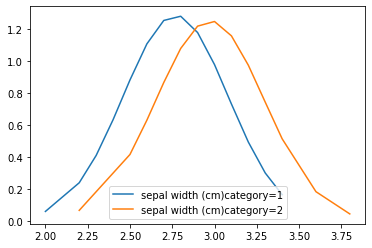


カラム名:petal length (cm)
平均の差:	1.2920000000000007
差の標準偏差:	-0.10250893440404629
自由度:		98
t値:		-12.603779441384985
p値:		3.1788195478061495e-22


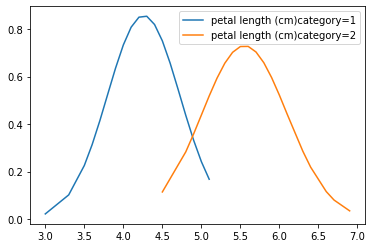


カラム名:petal width (cm)
平均の差:	0.7000000000000004
差の標準偏差:	-0.047862046657075594
自由度:		98
t値:		-14.625367047410148
p値:		2.111534400988573e-25


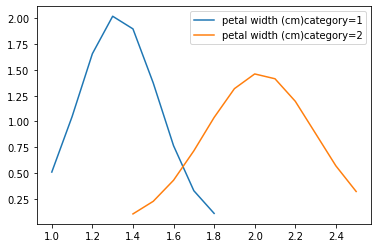

In [4]:
for i in range(len(y_data)):
    for j in range(i+1,len(y_data),1):
        print("カテゴリ%dとカテゴリ%dの比較"%(i, j))
        dfa = df[df[y_name]==i]
        dfb = df[df[y_name]==j]
        for col in df.columns:
            if col != y_name:
                print("カラム名:"+col)
                xa = dfa[col].values
                xb = dfb[col].values
                f, p = stats.bartlett(xa, xb)
                if (2 * p) <= 0.05:
                    t, p = stats.ttest_ind(xa, xb, equal_var=False)
                else:
                    t, p = stats.ttest_ind(xa, xb, equal_var=True)
                MU = abs(xa.mean()-xb.mean())
                SE = MU / t
                DF = len(xa) -1 + len(xb) -1
                print("平均の差:\t"+str(MU))
                print("差の標準偏差:\t"+str(SE))
                print("自由度:\t\t"+str(DF))
                print("t値:\t\t"+str(t))
                print("p値:\t\t"+str(p))
                ave0 = np.mean(xa)
                ave1 = np.mean(xb)
                var0 = np.var(xa)
                var1 = np.var(xb)
                y0 = stats.norm.pdf(x=np.sort(xa), loc=ave0, scale=np.sqrt(var0))
                y1 = stats.norm.pdf(x=np.sort(xb), loc=ave1, scale=np.sqrt(var1))
                plt.plot(np.sort(xa), y0, label=col+y_name+"="+str(i))
                plt.plot(np.sort(xb), y1, label=col+y_name+"="+str(j))
                plt.legend()
                plt.show()
                print()